<H1 style="text-align: center;">
  Energy Consumption Prediction in Steel Industries
</H1>
<H1 style="text-align: center;">
  Realized by : Omar Stahi / Rachid Dirhoussi
</H1>

# Phases :
- **collect data**
- **pre treatment**
- **model and sampling method**  
- **visualisation**

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Library Overview and Purpose

### `import pandas as pd`  
- **Purpose:** Reading, cleaning, and analyzing structured data.  
- **Use Case:** Data manipulation and preprocessing.

---

### `import numpy as np`  
- **Purpose:** Numerical computing with support for large, multi-dimensional arrays and matrices.  
- **Use Case:** Efficient mathematical operations and array manipulations.

---

### `import matplotlib.pyplot as plt`  
- **Purpose:** Plotting library for static, interactive, and animated visualizations.  
- **Use Case:**  
  - `pyplot` simplifies the creation of various plots like line, scatter, and bar charts.  

---

### `from sklearn.linear_model import LinearRegression`  
- **Purpose:** Linear regression modeling in scikit-learn.  
- **Use Case:** Fitting a linear model to predict target variables based on input features.

---

### `from sklearn.preprocessing import LabelEncoder`  
- **Purpose:** Converts categorical labels (e.g., text) into numerical values.  
- **Use Case:** Encoding string-based categorical variables for machine learning models.

---

### `from sklearn.ensemble import RandomForestRegressor`  
- **Purpose:** Regression tasks using an ensemble learning algorithm.  
- **Use Case:**  
  - Builds multiple decision trees.  
  - Averages predictions to enhance accuracy and robustness.

---

### `from sklearn.metrics import mean_squared_error, r2_score`  
- **Purpose:** Evaluates the performance of regression models.  
- **Metrics Explanation:**  
  1. **`mean_squared_error`**  
     - Calculates the average of squared differences between actual and predicted values.  
     - Lower values indicate better model performance.  
  2. **`r2_score`**  
     - Represents the proportion of variance in the dependent variable explained by the independent variables.  
     - Higher values indicate better predictive power.

---


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Phase  1 : collect data

In [8]:
Dataset = pd.read_csv("Steel_industry_data.csv")
Dataset

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


# Phase  2 : pre treatment

In [9]:
Dataset['Day_of_week'] = LabelEncoder().fit_transform(Dataset['Day_of_week'])
#for non-ordinal data like weekstatus and loadtype using OneHotEncoder might be better
#because This way, each category is represented independently, and no category is greater or lesser than another
Dataset = pd.get_dummies(Dataset, columns=['WeekStatus', 'Load_Type'])
Dataset

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,1,True,False,True,False,False
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,True,False,True,False,False
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,True,False,True,False,False
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,True,False,True,False,False
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,True,False,True,False,False
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,True,False,True,False,False
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,True,False,True,False,False
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,1,True,False,True,False,False


In [10]:
from sklearn.model_selection import train_test_split

# Define input (X) and target (y)
x = Dataset.drop(['date', 'Usage_kWh'], axis=1)  # Drop unnecessary columns
y = Dataset['Usage_kWh']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 17.849731863537063
R2 Score: 0.9842971926653052


In [15]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print("MSE (Random Forest):", mean_squared_error(y_test, y_pred_rf))
print("R2 Score (Random Forest):", r2_score(y_test, y_pred_rf))

MSE (Random Forest): 1.1005233170676352
R2 Score (Random Forest): 0.9990318450861128


## **Why Linear Regression Might Perform Poorly:**
In our dataset, relationships may not be strictly linear. For example:
The relationship between energy usage and factors like time of day or load type may be non-linear.


Random Forest Regression is like asking a group of experts (decision trees) to predict a value and then averaging their answers to get a final prediction. Here's how it works in simple terms:

1. Split the Dataset Randomly
Imagine splitting your dataset into many smaller random pieces.
Each decision tree in the forest gets a slightly different piece of the data to train on. This is called bootstrapping.
2. Grow Many Decision Trees
Each decision tree is trained to predict the target variable (like energy usage) based on its subset of data.
A decision tree is like a flowchart: it splits the data into smaller and smaller groups based on conditions (e.g., "Is NSM > 5000?").
3. Make Predictions
After training, each tree gives its own prediction for the target variable when presented with new data.
4. Combine the Predictions
Instead of relying on a single tree (which could be biased or inaccurate), Random Forest takes the average of predictions from all the trees.
This "averaging" makes the final prediction more robust and accurate.
Why Does It Work Well?
Randomness Helps Reduce Overfitting:
Trees are trained on random subsets of data and features, so they don’t memorize the training data.
Captures Complex Relationships:
Each tree captures different patterns in the data, and combining their predictions helps model complex relationships.




## **Simple Analogy:**
Think of Random Forest as asking 100 different weather stations for tomorrow's temperature.
Each station might make small mistakes.
But when you average their predictions, you're more likely to get a reliable result. 🌳+🌳+🌳 = 🌲

## **Parameters**
random_state=42:

Sets a specific seed for the random number generator.
Ensures reproducibility of results, meaning every time you run the code, the same random splits, samples, and trees are generated.
The value 42 is arbitrary; you can use any integer.
Why set a random state?

Without it, the model might give slightly different results every time because of the randomness in tree creation and data sampling.
n_estimators=100:

Specifies the number of decision trees in the forest.
More trees generally improve performance but also increase computation time.
Default is 100, which is a good starting point.
You can experiment with this value to balance accuracy and speed.


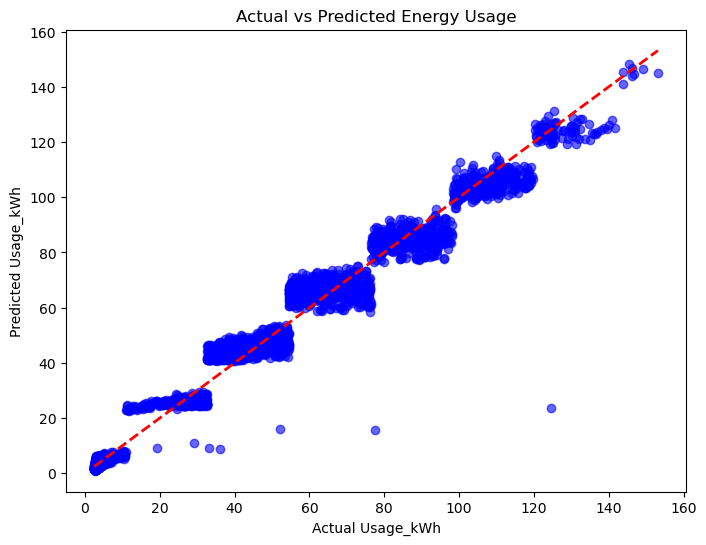

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Ideal line
plt.xlabel("Actual Usage_kWh")
plt.ylabel("Predicted Usage_kWh")
plt.title("Actual vs Predicted Energy Usage")
plt.show()


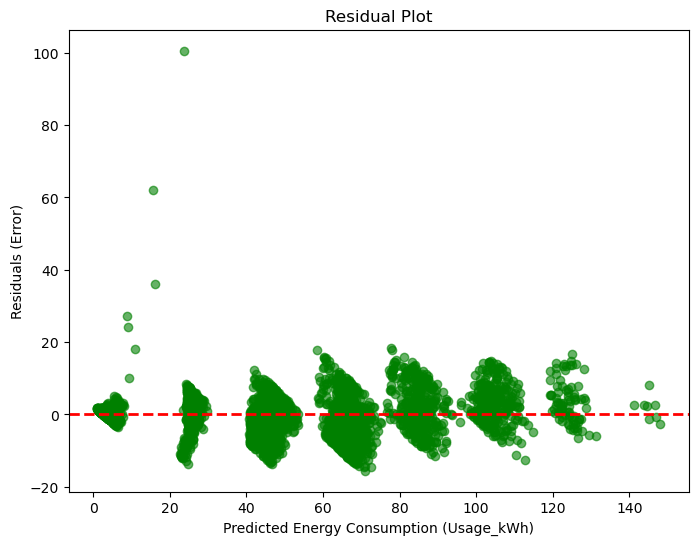

In [19]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Line for zero residual
plt.xlabel("Predicted Energy Consumption (Usage_kWh)")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()


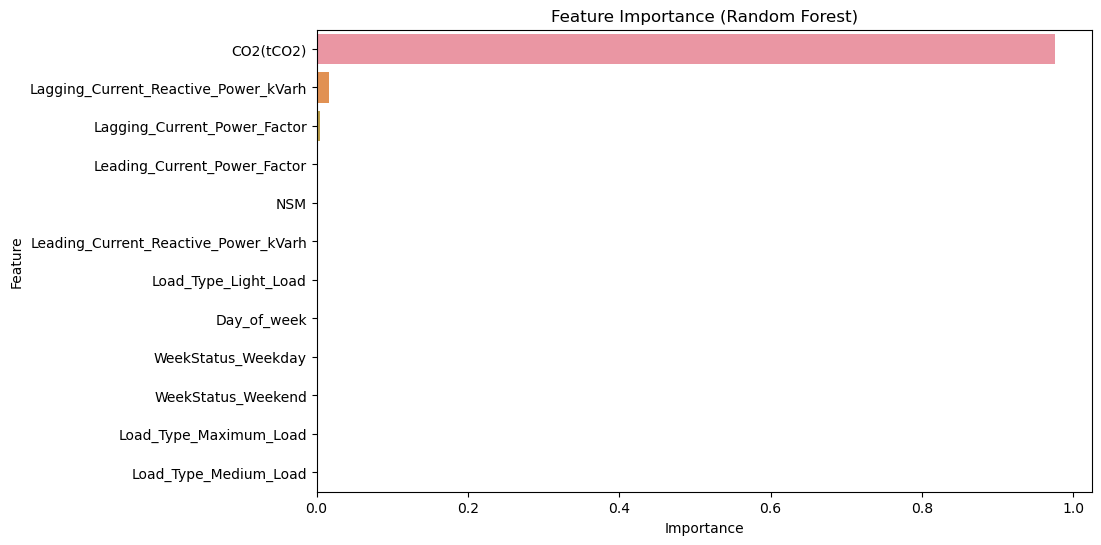

In [20]:
feature_importance = rf_model.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()


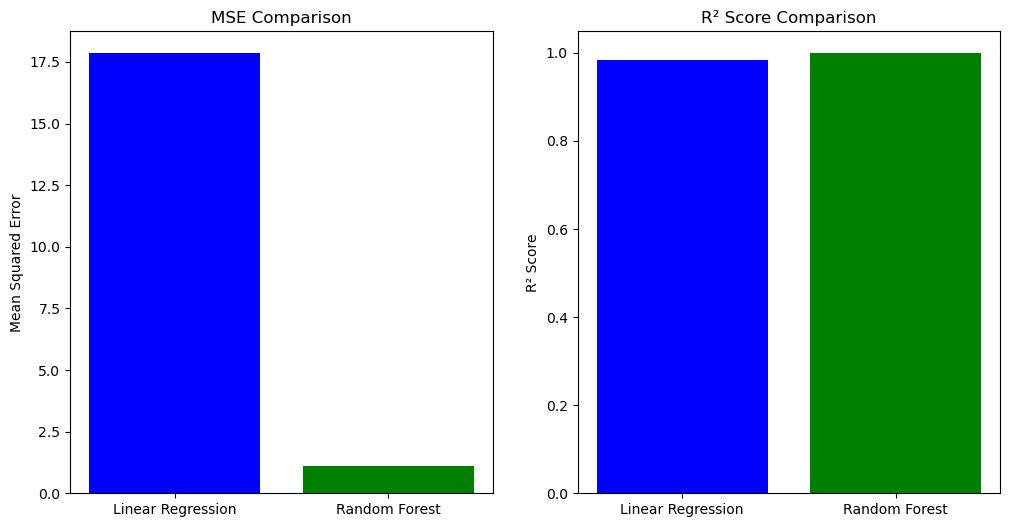

In [23]:
models = ['Linear Regression', 'Random Forest']
mse_scores = [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_rf)]
r2_scores = [r2_score(y_test, y_pred), r2_score(y_test, y_pred_rf)]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(models, mse_scores, color=['blue', 'green'])
ax[0].set_title("MSE Comparison")
ax[0].set_ylabel("Mean Squared Error")

ax[1].bar(models, r2_scores, color=['blue', 'green'])
ax[1].set_title("R² Score Comparison")
ax[1].set_ylabel("R² Score")

plt.show()
